## Identifying different paths through which a particular product passes through. Code to also test correlation between different columns.

In [2]:
import pandas as pd
import random
df = pd.read_csv("/home/data/MSA8010/msa8010f16t03/train_numeric.csv",nrows=10000)


In [3]:
df[['Id','L1_S24_F1846', 'L3_S32_F3850','L1_S24_F1695', 'L1_S24_F1632','L3_S33_F3855', 'L1_S24_F1604','L3_S29_F3407', 'L3_S33_F3865','L3_S38_F3952', 'L1_S24_F1723','Response']]

,Id,L1_S24_F1846,L3_S32_F3850,L1_S24_F1695,L1_S24_F1632,L3_S33_F3855,L1_S24_F1604,L3_S29_F3407,L3_S33_F3865,L3_S38_F3952,L1_S24_F1723,Response
0,4,NaN,NaN,NaN,NaN,-0.119,NaN,-0.702,0.026,NaN,NaN,0
1,6,NaN,NaN,NaN,NaN,-0.029,NaN,0.082,-0.047,NaN,NaN,0
2,7,NaN,NaN,NaN,NaN,0.199,NaN,0.104,0.108,NaN,NaN,0
3,9,NaN,NaN,NaN,NaN,0.017,NaN,0.063,0.035,NaN,NaN,0
4,11,NaN,NaN,NaN,NaN,-0.074,NaN,0.101,-0.006,NaN,NaN,0
5,13,NaN,NaN,NaN,NaN,0.017,NaN,0.082,-0.055,NaN,NaN,0
6,14,NaN,NaN,NaN,NaN,0.017,NaN,0.104,-0.055,NaN,NaN,0
7,16,0.111,NaN,-0.007,NaN,-0.210,NaN,0.057,-0.006,NaN,-0.006,0
8,18,NaN,NaN,NaN,NaN,0.017,NaN,0.082,0.010,NaN,NaN,0
9,23,NaN,NaN,NaN,NaN,0.153,NaN,-0.680,0.018,NaN,NaN,0


In [4]:
d = {}
path_labels = pd.Series()
for index, row in df.iterrows():
    
    r1 = row.squeeze()
    label= pd.Series(r1.index[r1.isnull() == False])

    del label[0] #removing the ID column
#    del label[label.count()] #removing response column


#removing LFS from col names
    label = label.str.replace('L','')
    label =label.str.replace('F','')
    label =label.str.replace('S','')
    label =label.str.replace('_','')
    
    final_label = ''.join(label)
    #print final_label 
    if final_label in d:
        #pass
        path_labels = path_labels.append(pd.Series([d[final_label]]))
    else:
        d[final_label] = ''.join(random.choice('0123456789ABCDEF') for i in range(20))
        path_labels = path_labels.append(pd.Series([d[final_label]]))

In [5]:
path_labels =  path_labels.reset_index()
del path_labels['index'] 

In [6]:
df['path'] = path_labels

In [7]:
df_grouped_path = pd.DataFrame(df.groupby('path')['Id'].count().sort_values(ascending=False)).reset_index()
df_grouped_path

,path,Id
0,23B64A6101BCFAC5E5B1,100
1,3D34EB8751A6218AE9CF,98
2,571EBDF5FAE40F248BA9,98
3,8591B89BF116BD8E54FC,94
4,F83DAFB6554D5EC29ECF,86
5,5825975C74CBB31E447A,86
6,F46701227018EC0BA09B,77
7,9813524E4D179EF52C63,75
8,D357623F552FDC52D968,75
9,AD64473A07D0477454D2,73


In [33]:

df = pd.read_csv("/home/data/MSA8010/msa8010f16t03/train_numeric.csv")

In [96]:
srch = pd.Series(list(df.columns.values))
#srch
stn0 =srch[srch.str.contains("L0_S2_")]
df_f = df[stn0]

In [97]:
df_f

,L0_S2_F32,L0_S2_F36,L0_S2_F40,L0_S2_F44,L0_S2_F48,L0_S2_F52,L0_S2_F56,L0_S2_F60,L0_S2_F64
0,-0.213,-0.023,-0.192,-0.088,0.001,0.0,0.01,-0.223,-0.030
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-0.013,0.011,0.008,-0.060,-0.005,0.0,0.01,-0.223,-0.077
3,-0.013,0.120,0.008,-0.231,0.005,0.0,0.01,0.050,0.056
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,-0.013,-0.101,0.008,-0.268,0.001,0.0,0.01,-0.233,0.003
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
import seaborn as sns
import matplotlib as plt

In [98]:
c = df_f.corr()
c

,L0_S2_F32,L0_S2_F36,L0_S2_F40,L0_S2_F44,L0_S2_F48,L0_S2_F52,L0_S2_F56,L0_S2_F60,L0_S2_F64
L0_S2_F32,1.000000,-0.323401,0.785945,-0.139532,0.044759,-0.132195,0.714941,0.025015,-0.122759
L0_S2_F36,-0.323401,1.000000,0.027172,0.003666,0.008949,0.014588,0.025499,-0.005853,0.028422
L0_S2_F40,0.785945,0.027172,1.000000,-0.592769,0.012500,-0.103472,0.621126,0.028134,-0.283849
L0_S2_F44,-0.139532,0.003666,-0.592769,1.000000,0.046124,0.012973,-0.088759,-0.044162,0.189123
L0_S2_F48,0.044759,0.008949,0.012500,0.046124,1.000000,0.801537,0.013051,0.044243,0.031486
L0_S2_F52,-0.132195,0.014588,-0.103472,0.012973,0.801537,1.000000,-0.122682,0.012501,0.027079
L0_S2_F56,0.714941,0.025499,0.621126,-0.088759,0.013051,-0.122682,1.000000,-0.563690,-0.033341
L0_S2_F60,0.025015,-0.005853,0.028134,-0.044162,0.044243,0.012501,-0.563690,1.000000,-0.006927
L0_S2_F64,-0.122759,0.028422,-0.283849,0.189123,0.031486,0.027079,-0.033341,-0.006927,1.000000


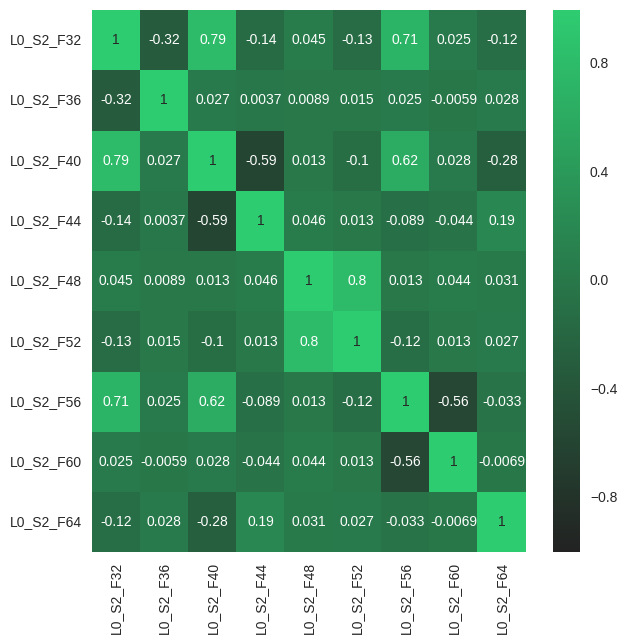

In [100]:
#%matplotlib inline
fig = plt.pyplot.gcf()
fig.set_size_inches(7, 7)
cmap = sns.dark_palette("#2ecc71", as_cmap=True)
sns.heatmap(c,cmap=cmap,annot=True)
